# Model Implementation

### Introduction

In this file, we implement a Decision Tree model. We begin by creating and processing the features that will be used as inputs for the model, followed by training, evaluating, and analyzing the model’s performance.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [119]:
try:
    data = pd.read_csv('credit_card_cleaned.csv')
except:
    print('Error while loading the file')

In [120]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,customer_id_str,customer_id,age,trans_date,trans_time,age_bin,hour,time_bin,day_of_week
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,"jennifer_banks_f_psychologist, counselling_mor...",0,37,2019-01-01,00:00:18,30-39,0,00:00-02:00,Tuesday
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,stephanie_gill_f_special educational needs tea...,1,47,2019-01-01,00:00:44,40-49,0,00:00-02:00,Tuesday
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,edward_sanchez_m_nature conservation officer_m...,2,63,2019-01-01,00:00:51,60-69,0,00:00-02:00,Tuesday
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,jeremy_white_m_patent attorney_boulder,3,58,2019-01-01,00:01:16,50-59,0,00:00-02:00,Tuesday
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,tyler_garcia_m_dance movement psychotherapist_...,4,39,2019-01-01,00:03:06,30-39,0,00:00-02:00,Tuesday


In [121]:
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'customer_id_str', 'customer_id', 'age', 'trans_date', 'trans_time', 'age_bin', 'hour', 'time_bin', 'day_of_week'],
      dtype='object')

### Train Test Split

In [122]:
# Features
X = data.drop("is_fraud", axis=1)

# Target
y = data["is_fraud"]

# Train-test split (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [123]:
# Checking distribution in the original dataset
print("Original dataset:")
print(y.value_counts(normalize=True) * 100)

# Checking distribution in training set
print("\nTraining set:")
print(y_train.value_counts(normalize=True) * 100)

# Checking distribution in test set
print("\nTest set:")
print(y_test.value_counts(normalize=True) * 100)

Original dataset:
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

Training set:
is_fraud
0    99.421116
1     0.578884
Name: proportion, dtype: float64

Test set:
is_fraud
0    99.421212
1     0.578788
Name: proportion, dtype: float64


The dataset was split into training and test sets using an 80/20 ratio with stratification on the target variable (`is_fraud`).  
This ensures that the class distribution (fraud ≈ 0.58%, non-fraud ≈ 99.42%) is preserved across both sets, preventing bias during model training and evaluation.

### Features

**Categories**

Although transaction categories are likely to be highly predictive of customer behavior, I decided not to include them in the current feature set. The main reason is memory constraints: aggregating per-customer statistics (count, fraction, median, std) for each of the 14 categories creates large intermediate DataFrames that exceed the available memory on the current system. As a result, including these features would prevent the pipeline from running efficiently. While I acknowledge the importance of categories for predictive power, I opted to focus on other high-signal features that can be computed without exceeding memory limits.

In [124]:
print(f"Number of distinct categories in the data set: {len(X_train["category"].unique())}")

Number of distinct categories in the data set: 14


**States**

Initially I was going to use One-Hot Encoding to add states as a feature to the model however due to facing memory constraints,  as there are 51 unique values, this feature had to be dropped. However, we will still use latitude and longitude, so location-based information is retained in the model. 

In [125]:
print(f"Number of distinct states in the data set: {len(X_train["state"].unique())}")

Number of distinct states in the data set: 51


**Merchants**

In [126]:
print(f"Number of distinct merchants in the data set: {len(X_train["merchant"].unique())}")

Number of distinct merchants in the data set: 693


**Jobs**

In [127]:
print(f"Number of distinct jobs in the data set: {len(X_train["job"].unique())}")

Number of distinct jobs in the data set: 494


**Cities**

In [128]:
print(f"Number of distinct cities in the data set: {len(X_train["city"].unique())}")

Number of distinct cities in the data set: 894


**Dropped Features:**

- `cc_num`,`unix_time`: Provides no predictive value as a feature.

- `merchant`, `job`, `city`, `category`: Have a very high number of unique values. To keep the model simple and focus on higher-signal features, these are dropped.

- `first`, `last`: Customer names—do not provide predictive value.

- `street`, `city`, `zip`, `merch_zipcode`, `state`: Redundant since lat, long, and city_pop capture location information.

-  `customer_id_str`: Not needed as predictive features.

In [129]:
# List of columns to drop
cols_to_drop = [
    "cc_num", "merchant", "job", "city", 
    "first", "last", "street", "zip", 'category',
    "customer_id_str", "merch_zipcode" ,"state",'unix_time'
]

# Drop columns from X_train and X_test
for col in cols_to_drop:
    if col in X_train.columns:
        X_train.drop(columns=col, inplace=True)
    if col in X_test.columns:
        X_test.drop(columns=col, inplace=True)

**Transaction Amount**

- Median of Transaction Amount
- STD of Transaction Amount
- Ratio of Transaction Amount (amount/median)
- Amount

In [130]:
customer_stats_train = X_train.groupby("customer_id")["amt"].agg(
    median_amount="median",
    std_amount="std"
).fillna(0).reset_index()

X_train = X_train.merge(customer_stats_train, on="customer_id", how="left")

# creating ratio of transaction amount to median
X_train["amt_ratio_to_median"] = X_train["amt"] / X_train["median_amount"]

In [131]:
X_test = X_test.merge(customer_stats_train, on="customer_id", how="left")

X_test["median_amount"] = X_test["median_amount"].fillna(X_train["median_amount"].median())
X_test["std_amount"] = X_test["std_amount"].fillna(X_train["std_amount"].median())

X_test["amt_ratio_to_median"] = X_test["amt"] / X_test["median_amount"]

In [132]:
X_train[["median_amount", "std_amount", "amt_ratio_to_median","amt"]].head()

,median_amount,std_amount,amt_ratio_to_median,amt
0,35.39,263.452309,1.461147,51.71
1,54.86,122.289360,0.251185,13.78
2,31.44,118.114322,30.574427,961.26
3,38.64,101.745602,1.130435,43.68
4,16.84,103.456373,1.964371,33.08


**Transaction Time**

- Median of Transaction Time per Bin
- STD of Transaction Time per Bin
- Fraction of transactions per time interval
- Raw transaction time

Binning - 2-Hour Time Intervals.

The reason for using 2-hour intervals is based on the EDA visualization, which showed that the time intervals with the most fraud cases are 22:00–24:00, 00:00–02:00, and 02:00–04:00. To preserve this information, I chose to keep the 2-hour time bins.

In [133]:
bins = list(range(0, 25, 2))  # [0,2,4,...,24] - 2-Hour Time Intervals
labels = [f"{h:02d}:00-{h+2:02d}:00" for h in bins[:-1]]

# Create the 'time_bin' column for X_train
X_train["time_bin"] = pd.cut(X_train["hour"], bins=bins, labels=labels, right=False)

# Ordinal encoding: map each label to a number
time_bin_mapping = {label: idx for idx, label in enumerate(labels)}
X_train["time_bin_encoded"] = X_train["time_bin"].map(time_bin_mapping)

In [134]:
X_test["time_bin"] = pd.cut(X_test["hour"], bins=bins, labels=labels, right=False)
X_test["time_bin_encoded"] = X_test["time_bin"].map(time_bin_mapping)

In [135]:
cust_bin_stats = X_train.groupby(
    ["customer_id", "time_bin_encoded"], observed=True
)["amt"].agg(median_amt="median", std_amt="std").unstack(fill_value=0)

cust_bin_stats.columns = [f"{stat}_time_{bin}" for stat, bin in cust_bin_stats.columns]

X_train = X_train.merge(cust_bin_stats, left_on="customer_id", right_index=True, how="left")

In [136]:
X_test = X_test.merge(cust_bin_stats, left_on="customer_id", right_index=True, how="left")

In [137]:
# Compute count per customer per time bin
cust_bin_counts = X_train.groupby(
    ["customer_id", "time_bin_encoded"], observed=True
).size().unstack(fill_value=0)

cust_bin_frac = cust_bin_counts.div(cust_bin_counts.sum(axis=1), axis=0)

cust_bin_frac.columns = [f"frac_time_{col}" for col in cust_bin_frac.columns]

X_train = X_train.merge(cust_bin_frac, left_on="customer_id", right_index=True, how="left", suffixes=('', '_frac'))

In [138]:
X_test = X_test.merge(cust_bin_frac, left_on="customer_id", right_index=True, how="left")

We include the raw transaction time as a numeric feature to capture the exact hour and minute of each transaction. This allows the model to detect patterns associated with fraud, complementing the binned time intervals that capture broader behavioral trends.

In [139]:
X_train['trans_time_numeric'] = (
    pd.to_datetime(X_train['trans_time'], format='%H:%M:%S').dt.hour +
    pd.to_datetime(X_train['trans_time'], format='%H:%M:%S').dt.minute / 60
)

X_test['trans_time_numeric'] = (
    pd.to_datetime(X_test['trans_time'], format='%H:%M:%S').dt.hour +
    pd.to_datetime(X_test['trans_time'], format='%H:%M:%S').dt.minute / 60
)

In [140]:
X_train[["trans_time_numeric"]].head()

,trans_time_numeric
0,3.216667
1,19.933333
2,14.700000
3,21.450000
4,14.250000


In [141]:
X_train[[
    "median_amt_time_0", "median_amt_time_1", "median_amt_time_2","median_amt_time_3",
    "median_amt_time_4","median_amt_time_5","median_amt_time_6","median_amt_time_7",
    "median_amt_time_8","median_amt_time_9","median_amt_time_10","median_amt_time_11"
]].head()

,median_amt_time_0,median_amt_time_1,median_amt_time_2,median_amt_time_3,median_amt_time_4,median_amt_time_5,median_amt_time_6,median_amt_time_7,median_amt_time_8,median_amt_time_9,median_amt_time_10,median_amt_time_11
0,65.280,64.910,66.955,62.280,68.11,68.67,14.330,11.27,10.680,9.715,15.81,24.020
1,79.080,77.730,84.720,79.720,82.33,96.79,53.455,42.13,37.790,41.240,38.47,43.495
2,61.485,64.950,65.600,64.535,64.74,65.50,15.230,10.89,12.610,9.775,13.03,14.990
3,36.245,54.255,42.610,49.450,56.32,46.34,32.645,36.38,21.310,35.110,22.92,35.420
4,53.760,56.780,64.685,44.585,50.70,48.04,23.860,9.77,8.255,10.640,15.46,8.235


In [142]:
X_train[[
    "std_amt_time_0", "std_amt_time_1", "std_amt_time_2", "std_amt_time_3",
    "std_amt_time_4", "std_amt_time_5", "std_amt_time_6", "std_amt_time_7",
    "std_amt_time_8", "std_amt_time_9", "std_amt_time_10", "std_amt_time_11"
]].head()

,std_amt_time_0,std_amt_time_1,std_amt_time_2,std_amt_time_3,std_amt_time_4,std_amt_time_5,std_amt_time_6,std_amt_time_7,std_amt_time_8,std_amt_time_9,std_amt_time_10,std_amt_time_11
0,99.411981,88.242037,65.004556,35.778438,39.455428,265.597681,124.119577,178.655547,119.913434,652.747917,75.107695,69.603651
1,98.485292,130.377229,105.665749,74.721766,112.881783,93.658322,119.682976,112.425766,134.354231,186.162733,75.014655,97.860854
2,86.733131,124.017559,48.002366,35.917168,35.612385,44.136540,189.737212,151.689934,111.959364,77.690434,131.462110,88.382094
3,150.495816,63.425167,191.364818,144.136917,77.412894,48.708170,49.051254,108.565692,43.777295,49.203022,49.391757,127.114736
4,18.541114,14.570058,19.616799,19.010320,20.890197,28.992835,40.154480,74.815976,85.094995,65.819230,229.663710,40.897920


In [143]:
X_train[[
    "frac_time_0", "frac_time_1", "frac_time_2", "frac_time_3",
    "frac_time_4", "frac_time_5", "frac_time_6", "frac_time_7",
    "frac_time_8", "frac_time_9", "frac_time_10", "frac_time_11"
]].head()

,frac_time_0,frac_time_1,frac_time_2,frac_time_3,frac_time_4,frac_time_5,frac_time_6,frac_time_7,frac_time_8,frac_time_9,frac_time_10,frac_time_11
0,0.053217,0.055636,0.048379,0.051766,0.053701,0.040155,0.099178,0.110789,0.115627,0.134494,0.109821,0.127238
1,0.045253,0.054599,0.052140,0.038859,0.049680,0.042794,0.131825,0.118544,0.120512,0.115101,0.111658,0.119036
2,0.041179,0.050868,0.046427,0.050868,0.054501,0.052079,0.125555,0.126363,0.117077,0.111425,0.114251,0.109407
3,0.072376,0.089264,0.067551,0.079614,0.078408,0.095296,0.096502,0.085645,0.073583,0.067551,0.089264,0.104946
4,0.020942,0.020942,0.020942,0.036649,0.028796,0.023560,0.136126,0.130890,0.120419,0.164921,0.149215,0.146597


**Day of the Week**

- Median Transaction Amount per Day of the Week per Customer
- STD Transaction Amount per Day of the Week per Customer
- Frequency of Spending per Day per Customer

Ordinal Encoding, due to the day sof the week having a natrual order.

In [144]:
# Map days to numbers (Monday=0, ..., Sunday=6)
day_mapping = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}
X_train["day_encoded"] = X_train["day_of_week"].map(day_mapping)
X_test["day_encoded"] = X_test["day_of_week"].map(day_mapping)

In [145]:
cust_day_stats = X_train.groupby(["customer_id", "day_of_week"])["amt"].agg(
    median_amt="median",
    std_amt="std"
).unstack(fill_value=0)

cust_day_stats.columns = [f"{stat}_week_{day}" for stat, day in cust_day_stats.columns]

cust_day_counts = X_train.groupby(["customer_id", "day_of_week"]).size().unstack(fill_value=0)
cust_day_frac = cust_day_counts.div(cust_day_counts.sum(axis=1), axis=0)
cust_day_frac.columns = [f"frac_week_{day}" for day in cust_day_frac.columns]

X_train = X_train.merge(cust_day_stats, left_on="customer_id", right_index=True, how="left")
X_train = X_train.merge(cust_day_frac, left_on="customer_id", right_index=True, how="left")

X_test = X_test.merge(cust_day_stats, left_on="customer_id", right_index=True, how="left")
X_test = X_test.merge(cust_day_frac, left_on="customer_id", right_index=True, how="left")

In [146]:
X_train[[
  'median_amt_week_Friday','median_amt_week_Monday','median_amt_week_Saturday',
  'median_amt_week_Sunday','median_amt_week_Thursday','median_amt_week_Tuesday',
  'median_amt_week_Wednesday'
]].head()

,median_amt_week_Friday,median_amt_week_Monday,median_amt_week_Saturday,median_amt_week_Sunday,median_amt_week_Thursday,median_amt_week_Tuesday,median_amt_week_Wednesday
0,31.56,38.955,33.505,41.685,32.540,27.610,33.795
1,56.16,56.670,55.330,54.730,59.155,53.505,47.565
2,35.00,30.745,30.720,35.620,24.200,30.195,34.400
3,34.42,40.830,46.600,26.405,53.315,39.960,26.880
4,14.31,19.550,15.715,26.235,16.830,10.100,8.100


In [147]:
X_train[[
  'std_amt_week_Friday','std_amt_week_Monday','std_amt_week_Saturday',
  'std_amt_week_Sunday','std_amt_week_Thursday','std_amt_week_Tuesday',
  'std_amt_week_Wednesday'
]].head()

,std_amt_week_Friday,std_amt_week_Monday,std_amt_week_Saturday,std_amt_week_Sunday,std_amt_week_Thursday,std_amt_week_Tuesday,std_amt_week_Wednesday
0,153.338891,99.618981,106.812824,107.910379,702.276250,146.644547,60.635849
1,117.873403,85.902980,164.819663,120.738044,132.673838,121.768036,97.616337
2,129.401611,107.741302,75.002686,65.406119,141.757384,92.801400,201.973725
3,65.518422,69.302789,49.846121,104.209923,203.707805,65.912639,97.976045
4,62.360823,43.922000,230.262230,54.880121,78.960743,30.810509,42.687108


In [148]:
X_train[[
 'frac_week_Friday','frac_week_Monday','frac_week_Saturday',
 'frac_week_Sunday','frac_week_Thursday','frac_week_Tuesday',
 'frac_week_Wednesday'
]].head()

,frac_week_Friday,frac_week_Monday,frac_week_Saturday,frac_week_Sunday,frac_week_Thursday,frac_week_Tuesday,frac_week_Wednesday
0,0.126270,0.179971,0.153846,0.179971,0.116594,0.138849,0.104499
1,0.114117,0.220856,0.172651,0.179538,0.105263,0.115101,0.092474
2,0.122325,0.188938,0.141704,0.188131,0.119499,0.125959,0.113444
3,0.102533,0.199035,0.162847,0.173703,0.115802,0.131484,0.114596
4,0.091623,0.217277,0.157068,0.251309,0.075916,0.109948,0.096859


**Age**

- Relative frequency per age bin
- Median transaction amount per age bin
- Age

Binning - Defining 10-year bins starting at 20

In [149]:
age_bin_counts_train = X_train.groupby("age_bin")["trans_num"].count()
total_transactions_train = len(X_train)
age_bin_rel_freq_train = (age_bin_counts_train / total_transactions_train).reset_index(name="age_bin_rel_freq")

X_train['age_bin_rel_freq'] = X_train['age_bin'].map(
    age_bin_rel_freq_train.set_index('age_bin')['age_bin_rel_freq']
)

X_test['age_bin_rel_freq'] = X_test['age_bin'].map(
    age_bin_rel_freq_train.set_index('age_bin')['age_bin_rel_freq']
)

age_bin_median_train = X_train.groupby("age_bin")["amt"].median().reset_index(name="age_bin_median_amt")

X_train = X_train.merge(age_bin_median_train, on="age_bin", how="left")

X_test = X_test.merge(age_bin_median_train, on="age_bin", how="left")



In [150]:
X_train[[
    "age_bin_rel_freq",
    "age_bin_median_amt",
    "age"
]].head()

,age_bin_rel_freq,age_bin_median_amt,age
0,0.203372,51.58,34
1,0.208771,46.98,54
2,0.219546,52.31,41
3,0.208771,46.98,59
4,0.079303,36.43,27


These features are created this way to capture group-level behavioral patterns more accurately for customers, by summarizing statistics such as median spending and transaction frequency for each age group.

**Gender**

In [151]:
# One-hot encode gender
X_train["gender"] = X_train["gender"].map({"M": 1, "F": 0})
X_test["gender"] = X_test["gender"].map({"M": 1, "F": 0})

According to [The Fintech Times](https://thefintechtimes.com/women-are-less-likely-to-have-experienced-a-financial-scam-than-men/), women are less likely to experience financial scams compared to men (9% versus 15%). This suggests that including gender as a feature could provide useful predictive value. In this project, gender will be one-hot encoded to ensure it is properly represented in the model.

**Dropped the Rest of the Unneeded Features:**

- `trans_date`, `trans_time`: Already used to generate other features in a processed form.

- `day_of_week`, `age_bin`, `dob`, `time_bin`: Already used to create behavioral features, so the original columns are not needed.

- `customer_id`, `trans_num`: already used to help create features and now is no longer needed as it doesn't have any predictive value.

In [152]:
# List of columns to drop
cols_to_drop = [ 
    "trans_date", "trans_time",'time_bin', "trans_num",
    "day_of_week", "age_bin", 'dob', 'customer_id'
]

# Drop columns from X_train and X_test
for col in cols_to_drop:
    if col in X_train.columns:
        X_train.drop(columns=col, inplace=True)
    if col in X_test.columns:
        X_test.drop(columns=col, inplace=True)


In [153]:
X_train.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,age,hour,median_amount,std_amount,amt_ratio_to_median,time_bin_encoded,median_amt_time_0,median_amt_time_1,median_amt_time_2,median_amt_time_3,median_amt_time_4,median_amt_time_5,median_amt_time_6,median_amt_time_7,median_amt_time_8,median_amt_time_9,median_amt_time_10,median_amt_time_11,std_amt_time_0,std_amt_time_1,std_amt_time_2,std_amt_time_3,std_amt_time_4,std_amt_time_5,std_amt_time_6,std_amt_time_7,std_amt_time_8,std_amt_time_9,std_amt_time_10,std_amt_time_11,frac_time_0,frac_time_1,frac_time_2,frac_time_3,frac_time_4,frac_time_5,frac_time_6,frac_time_7,frac_time_8,frac_time_9,frac_time_10,frac_time_11,trans_time_numeric,day_encoded,median_amt_week_Friday,median_amt_week_Monday,median_amt_week_Saturday,median_amt_week_Sunday,median_amt_week_Thursday,median_amt_week_Tuesday,median_amt_week_Wednesday,std_amt_week_Friday,std_amt_week_Monday,std_amt_week_Saturday,std_amt_week_Sunday,std_amt_week_Thursday,std_amt_week_Tuesday,std_amt_week_Wednesday,frac_week_Friday,frac_week_Monday,frac_week_Saturday,frac_week_Sunday,frac_week_Thursday,frac_week_Tuesday,frac_week_Wednesday,age_bin_rel_freq,age_bin_median_amt
0,51.71,0,44.6087,-74.9732,69,44.785928,-74.659301,34,3,35.39,263.452309,1.461147,1,65.280,64.910,66.955,62.280,68.11,68.67,14.330,11.27,10.680,9.715,15.81,24.020,99.411981,88.242037,65.004556,35.778438,39.455428,265.597681,124.119577,178.655547,119.913434,652.747917,75.107695,69.603651,0.053217,0.055636,0.048379,0.051766,0.053701,0.040155,0.099178,0.110789,0.115627,0.134494,0.109821,0.127238,3.216667,4,31.56,38.955,33.505,41.685,32.540,27.610,33.795,153.338891,99.618981,106.812824,107.910379,702.276250,146.644547,60.635849,0.126270,0.179971,0.153846,0.179971,0.116594,0.138849,0.104499,0.203372,51.58
1,13.78,0,31.9290,-97.6443,2526,31.414028,-98.152203,54,19,54.86,122.289360,0.251185,9,79.080,77.730,84.720,79.720,82.33,96.79,53.455,42.13,37.790,41.240,38.47,43.495,98.485292,130.377229,105.665749,74.721766,112.881783,93.658322,119.682976,112.425766,134.354231,186.162733,75.014655,97.860854,0.045253,0.054599,0.052140,0.038859,0.049680,0.042794,0.131825,0.118544,0.120512,0.115101,0.111658,0.119036,19.933333,5,56.16,56.670,55.330,54.730,59.155,53.505,47.565,117.873403,85.902980,164.819663,120.738044,132.673838,121.768036,97.616337,0.114117,0.220856,0.172651,0.179538,0.105263,0.115101,0.092474,0.208771,46.98
2,961.26,0,48.3400,-122.3456,85,49.118546,-122.622065,41,14,31.44,118.114322,30.574427,7,61.485,64.950,65.600,64.535,64.74,65.50,15.230,10.89,12.610,9.775,13.03,14.990,86.733131,124.017559,48.002366,35.917168,35.612385,44.136540,189.737212,151.689934,111.959364,77.690434,131.462110,88.382094,0.041179,0.050868,0.046427,0.050868,0.054501,0.052079,0.125555,0.126363,0.117077,0.111425,0.114251,0.109407,14.700000,6,35.00,30.745,30.720,35.620,24.200,30.195,34.400,129.401611,107.741302,75.002686,65.406119,141.757384,92.801400,201.973725,0.122325,0.188938,0.141704,0.188131,0.119499,0.125959,0.113444,0.219546,52.31
3,43.68,1,40.0235,-120.7986,128,39.528098,-121.059990,59,21,38.64,101.745602,1.130435,10,36.245,54.255,42.610,49.450,56.32,46.34,32.645,36.38,21.310,35.110,22.92,35.420,150.495816,63.425167,191.364818,144.136917,77.412894,48.708170,49.051254,108.565692,43.777295,49.203022,49.391757,127.114736,0.072376,0.089264,0.067551,0.079614,0.078408,0.095296,0.096502,0.085645,0.073583,0.067551,0.089264,0.104946,21.450000,0,34.42,40.830,46.600,26.405,53.315,39.960,26.880,65.518422,69.302789,49.846121,104.209923,203.707805,65.912639,97.976045,0.102533,0.199035,0.162847,0.173703,0.115802,0.131484,0.114596,0.208771,46.98
4,33.08,0,38.3511,-91.4867,6703,39.213785,-92.188153,27,14,16.84,103.456373,1.964371,7,53.760,56.780,64.685,44.585,50.70,48.04,23.860,9.77,8.255,10.640,15.46,8.235,18.541114,14.570058,19.616799,19.010320,20.890197,28.992835,40.154480,74.815976,85.094995,65.819230,229.663710,40.897920,0.020942,0.020942,0.020942,0.036649,0.028796,0.023560,0.136126,0.130890,0.120419,0.16492

### Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
y_pred = classifier.predict(X_test)

**Evaluating the Model**


In [156]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[257212    622]
 [   531    970]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.61      0.65      0.63      1501

    accuracy                           1.00    259335
   macro avg       0.80      0.82      0.81    259335
weighted avg       1.00      1.00      1.00    259335



##### Precision:

Indicates how many of the predicted positive instances are actually positive. A high precision indicates that the model is making few false positive predictions.

**Precision for class 0 (non-fraud)**: 1.00

**Precision for class 1 (fraud)**: 0.61

The model predicts 100% of the non-fraud class correctly, while the fruad class has 39% of false positives.

##### Recall: 

Indicates how many of the actual positive instances the model is able to correctly identify. A high recall indicates that the model is capturing most of the positive instances in the dataset.

**Recall for class 0 (non-fraud)**: 1.00

**Recall for class 1 (fraud)**: 0.65

The model is perfectly prediciting non-fraud class and only identifies 65% of fraud cases.

##### F1-score: 

Considers both false positives and false negatives, making it a useful metric for imbalanced datasets where precision and recall may be skewed.

**F1-score for class 0 (non-fraud)**: 1.00

**F1-score for class 1 (fraud)**: 0.62

The model's F1 score for the fraud class is 0.62 which is a farily good score indicating that the model has a good balance between precision and recall.

##### Macro Avg.:

Simple average of precision, recall, and F1 across all classes.

**The value being**: %81

Since the non-fraud class has higher scores, it can pull the average up in its favor.  
Still, this is a solid result.

##### Weighted Avg.:

It’s the average of precision, recall, and F1 across all classes, but weighted by the number of true samples in each class.

**The value being**: %100

This result is heavily influenced by the non-fraud class, which dominates the dataset.  
Because of this class imbalance, the weighted average may look perfect even though the fraud detection score is lower.


**Top 25 Features**

<Axes: >

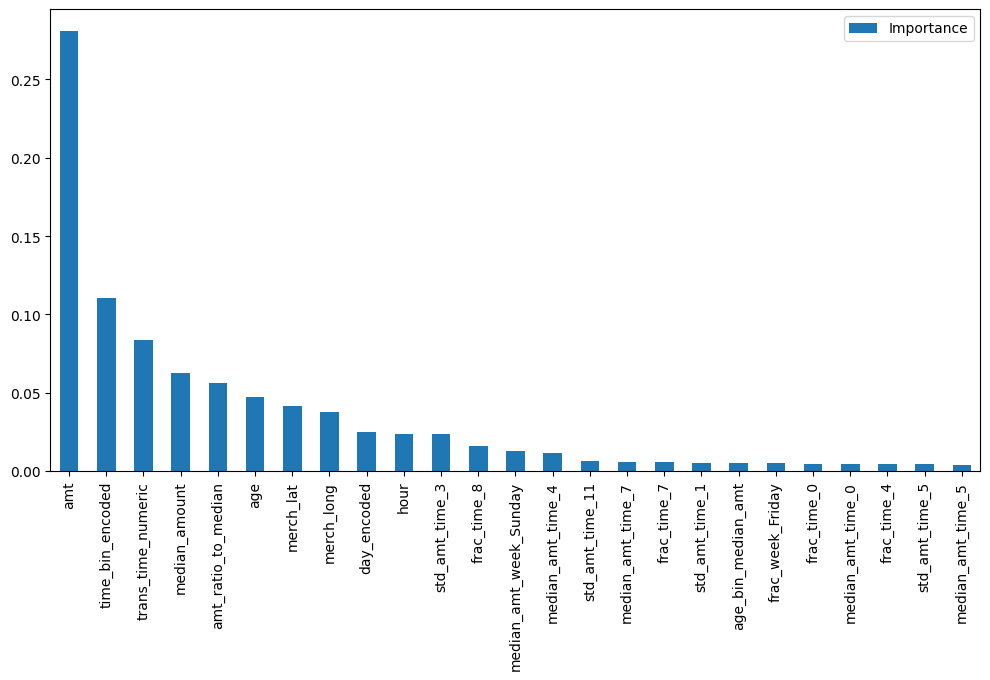

In [157]:
# Keep only the top 25 features
feat_importances = pd.DataFrame(classifier.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
top_feats = feat_importances.head(25)

top_feats.plot(kind='bar', figsize=(12,6))

The top-performing feature is **transaction amount**, which is expected since fraud cases tend to involve significantly higher amounts compared to normal transactions.

**Time-related features** are also important. From the EDA, we observed that most fraud cases occur during specific time periods. Similarly, transaction time (numeric) ranks as the third most useful feature.

The **age feature** plays a significant role as well, appearing as the fifth most important feature. This aligns with studies suggesting that age can be a factor in fraud susceptibility.

**Merchant geographic features** also contribute, indicating that fraudulent transactions are often attempted at locations different from the cardholder’s usual merchant locations.